In [2]:
from astropy import units
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/Users/nataliegosnell/miniconda3/envs/astroconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
M1, M2, period, perr, ecc, eccerr = np.genfromtxt('Carney2001_fieldBSS.txt', skip_header=1, usecols=(0,1,2,3,4,5), unpack=True)

In [4]:
periodecc = period * (1.0 - ecc)**1.5

In [5]:
masses = np.linspace(0.2,1.3,100)

In [6]:
porb = (1.3e5 * masses**6.25) / (1.0 + 4.0*masses**4.0)**1.5
porbplus = porb * 2.4
porbminus = porb / 2.4

In [7]:
bsperiod = np.array([3030, 120.221])
bsecc = np.array([0.36, 0.24])
bsm2 = np.array([0.50, 0.40])
bsm2_err = np.array([(0.01,0.04), (0.05, 0.04)])
bsperiodecc = bsperiod * (1.0 - bsecc)**1.5

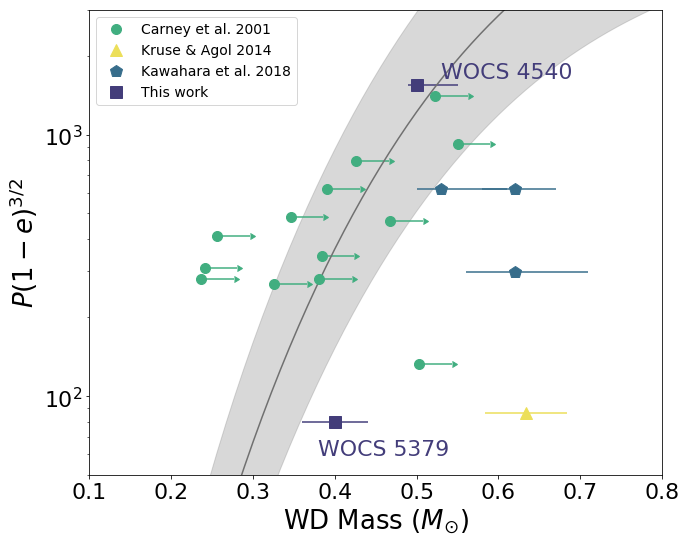

In [8]:
blue = '#433D7A'
teal = '#376D8B'
green = '#41AE80'
yellow = '#ECDF59'

plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=22)     # fontsize of the axes title
plt.rc('axes', labelsize=26)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title
fig, ax = plt.subplots(figsize=(10,8))
ax.semilogy(masses,porb, color='#707070')
#plt.plot(masses,porbplus)
#plt.plot(masses,porbminus)
ax.fill_between(masses, porbminus, porbplus, color='grey', alpha=0.3)
plt.errorbar(M2[:-4], periodecc[:-4], xerr=0.04, xlolims=True, 
             marker='o', linestyle=' ', markersize=10, label='Carney et al. 2001', color=green)
plt.errorbar(M2[13], periodecc[13], xerr=0.05 , marker='^', linestyle=' ', 
             markersize=12, label='Kruse & Agol 2014', color=yellow)
#plt.plot(M2[13], periodecc[13], marker='p', linestyle=' ', markersize=8)
plt.errorbar(M2[-3:], periodecc[-3:], xerr=[(0.03,0.04,0.06),(0.08,0.05,0.09)], 
             marker='p', linestyle=' ', markersize=12, label='Kawahara et al. 2018', color=teal)
plt.errorbar(bsm2, bsperiodecc, xerr=bsm2_err, marker='s', linestyle=' ', 
             markersize=12, label='This work', color=blue)
plt.text(bsm2[0]+0.03, bsperiodecc[0]+100, s="WOCS 4540", color=blue)
plt.text(bsm2[1]-0.02, bsperiodecc[1]-20, s="WOCS 5379", color=blue)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles, labels, loc='upper left',numpoints=1)
ax.axis([0.1,0.8,50,3000])
ax.set_xlabel(r'WD Mass $(M_{\odot})$')
ax.set_ylabel(r'$P(1-e)^{3/2}$')

plt.tight_layout()

plt.savefig('WDmass_Period.pdf',dpi=900)

In [89]:
period[-3:]

array([ 683.267,  727.98 ,  418.715])

In [9]:
wid, per67, ecc67, fm, minmass = np.genfromtxt('M67_RRs.txt', skip_header=1, usecols=(0,1,2,3,4), unpack=True)

In [10]:
periodecc67 = per67 * (1.0 - ecc67)**1.5

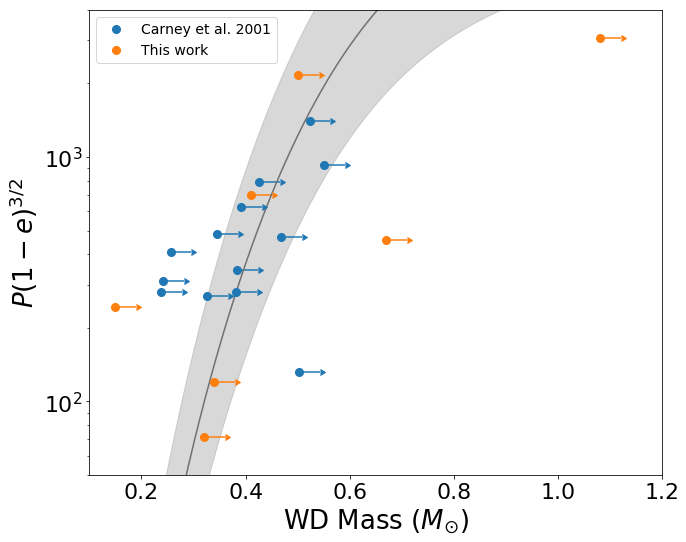

In [16]:
plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=22)     # fontsize of the axes title
plt.rc('axes', labelsize=26)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title
fig, ax = plt.subplots(figsize=(10,8))
ax.semilogy(masses,porb, color='#707070')
#plt.plot(masses,porbplus)
#plt.plot(masses,porbminus)
ax.fill_between(masses, porbminus, porbplus, color='grey', alpha=0.3)
plt.errorbar(M2[:-4], periodecc[:-4], xerr=0.04, xlolims=True, marker='o', linestyle=' ', markersize=8, label='Carney et al. 2001')
#plt.errorbar(M2[13], periodecc[13], xerr=0.05 , marker='^', linestyle=' ', markersize=10, label='Kruse & Agol 2014')
#plt.plot(M2[13], periodecc[13], marker='p', linestyle=' ', markersize=8)
#plt.errorbar(M2[-3:], periodecc[-3:], xerr=[(0.03,0.04,0.06),(0.08,0.05,0.09)], marker='p', linestyle=' ', markersize=10, label='Kawahara et al. 2018')
#plt.errorbar(bsm2, bsperiodecc, xerr=bsm2_err, marker='s', linestyle=' ', markersize=10, label='This work')
#plt.text(bsm2[0]-0.07, bsperiodecc[0]+200, s="WOCS 4540", color='red')
#plt.text(bsm2[1]-0.07, bsperiodecc[1]+10, s="WOCS 5379", color='red')
plt.errorbar(minmass, periodecc67, xerr=0.04, xlolims=True, marker='o', linestyle=' ', markersize=8, label='This work')
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles, labels, loc='upper left',numpoints=1)
ax.axis([0.1,1.2,50,4000])
ax.set_xlabel(r'WD Mass $(M_{\odot})$')
ax.set_ylabel(r'$P(1-e)^{3/2}$')

plt.tight_layout()

plt.savefig('WDmass_Period_M67.pdf',dpi=900)